In [14]:
import os
from glob import glob

import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data_paths = glob('E:\\dataset\\mnist_png\\training\\0\\*.png')
data_paths[0]

'E:\\dataset\\mnist_png\\training\\0\\1.png'

In [5]:
path = data_paths[0]
path

'E:\\dataset\\mnist_png\\training\\0\\1.png'

In [8]:
data_paths = tf.io.matching_files('E:\\dataset\\mnist_png\\training\\0\\*.png')
data_paths[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'E:\\dataset\\mnist_png\\training\\0\\1.png'>

In [9]:
path =data_paths[0]
path

<tf.Tensor: shape=(), dtype=string, numpy=b'E:\\dataset\\mnist_png\\training\\0\\1.png'>

# Load Image

In [10]:
gfile = tf.io.read_file(path)

In [11]:
image = tf.io.decode_image(gfile)

In [12]:
image.shape

TensorShape([28, 28, 1])

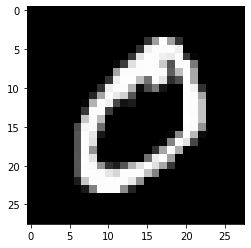

In [15]:
plt.imshow(image[:,:,0], 'gray')
plt.show()

# Set Data Generator

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [18]:
image.shape

TensorShape([28, 28, 1])

In [19]:
inputs = image[tf.newaxis, ...]
inputs.shape

TensorShape([1, 28, 28, 1])

In [20]:
image = next(iter(datagen.flow(inputs)))
image.shape

(1, 28, 28, 1)

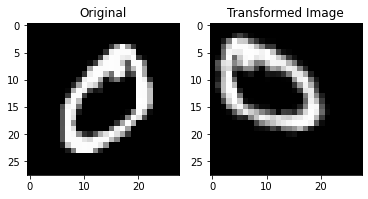

In [22]:
plt.subplot(121)
plt.title('Original')
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title('Transformed Image')
plt.imshow(np.squeeze(image), 'gray')
plt.show()

# **Transformation**
- width_shift_range
- height_shift_range
- brightness_range
- zoom_range
- horizontal_flip
- vertical_flip
- rescale
- preprocessing_function

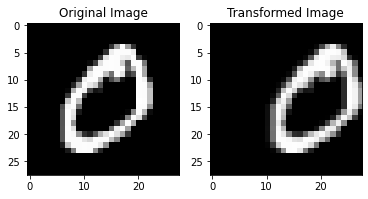

In [28]:
datagen = ImageDataGenerator(
   width_shift_range= 0.3
)

outputs = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title('Original Image')
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title('Transformed Image')
plt.imshow(np.squeeze(outputs), 'gray')
plt.show()

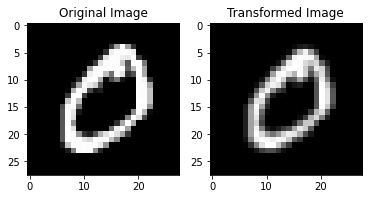

In [30]:
datagen = ImageDataGenerator(
   zoom_range = 0.3
)

outputs = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title('Original Image')
plt.imshow(np.squeeze(inputs), 'gray')

plt.subplot(122)
plt.title('Transformed Image')
plt.imshow(np.squeeze(outputs), 'gray')
plt.show()

# **Rescale시 주의사항**

In [ ]:
train_datagen = ImageDataGenerator(
    zoom_range=0.7,
    rescale=1./255.
)

test_datagen = ImageDataGenerator(rescale=1./255.)